In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('../../data/processed/final-dataset.csv')
df = df[df['team'] != df['opponent_team']].reset_index(drop=True)
df.head()

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,West Ham United,0,0,0,0,0.0,454,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0,Chelsea,0,0,0,0,0,14023,1.0,2.0,0.0,0,0,0,0,55,0,0,1
1,2016-17,Aaron Lennon,FWD,Everton,0,0,6,0,0.3,142,3,0,0,0.9,8.2,0.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,15,Tottenham Hotspur,0,0,0,0,0,13918,1.0,1.0,0.0,1,0,0,0,60,1,0,1
2,2016-17,Aaron Ramsey,MID,Arsenal,0,0,5,0,4.9,16,8,3,0,3.0,2.2,0.0,0.0,0.0,0.0,0.0,2016-08-14T15:00:00Z,60,Liverpool,0,0,0,0,0,163170,4.0,3.0,23.0,2,0,0,0,80,1,0,1
3,2016-17,Abdoulaye Doucouré,MID,Watford,0,0,0,0,0.0,482,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-13T14:00:00Z,0,Southampton,0,0,0,0,0,1051,1.0,1.0,0.0,0,0,0,0,50,0,0,1
4,2016-17,Abdul Rahman Baba,DEF,Chelsea,0,0,0,0,0.0,80,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-15T19:00:00Z,0,West Ham United,0,0,0,0,0,1243,1.0,2.0,0.0,0,0,0,0,55,1,0,1


## Feature Engineering

In [3]:
df = df.sort_values(by=['season', 'name', 'opponent_team', 'GW']).reset_index(drop=True)

### Create New Features

#### Calculate Last 5 Features (Team's Side)

In [4]:
def calculate_points(row):
    if row['was_home'] == 1:
        # Tim bermain kandang
        if row['team_a_score'] < row['team_h_score']:
            return 3  # Menang kandang
        elif row['team_a_score'] > row['team_h_score']:
            return 0  # Kalah kandang
        else:
            return 1  # Imbang
    else:
        # Tim bermain tandang
        if row['team_a_score'] > row['team_h_score']:
            return 3  # Menang tandang
        elif row['team_a_score'] < row['team_h_score']:
            return 0  # Kalah tandang
        else:
            return 1  # Imbang
        
df['points'] = df.apply(calculate_points, axis=1)

In [5]:
df = df.sort_values(by=['team', 'season', 'GW'])
df['team_tot_points_last_5_matches'] = df.groupby('team')['points'].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)

In [6]:
df = df.sort_values(by=['team', 'opponent_team', 'season', 'GW'])
df['team_tot_points_last_5_h2h'] = df.groupby(['team', 'opponent_team'])['points'].\
    rolling(window=5, min_periods=1).sum().reset_index(level=[0, 1], drop=True)

In [7]:
df.drop('points', axis=1, inplace=True)

In [8]:
df

,season,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team_tot_points_last_5_matches,team_tot_points_last_5_h2h
80408,2019-20,Kieran Trippier,DEF,Arsenal,0,0,0,0,0.0,334,6,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2019-08-10T16:30:00Z,0,Aston Villa,0,0,0,0,0,20975,1.0,3.0,0.0,0,0,0,0,55,1,0,1,12.0,3.0
68359,2019-20,Ainsley Maitland-Niles,DEF,Arsenal,0,0,-12,0,12.6,4,51,2,0,1.6,0.0,0.0,0.00,0.00,0.00,0.00,2019-09-22T15:30:00Z,40,Aston Villa,0,0,0,1,0,528279,2.0,3.0,8.0,-3,64791,88126,23335,51,1,0,6,7.0,6.0
68628,2019-20,Alexandre Lacazette,FWD,Arsenal,0,0,0,0,0.0,12,51,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2019-09-22T15:30:00Z,0,Aston Villa,0,0,0,0,0,120755,2.0,3.0,0.0,0,-34912,686,35598,94,1,0,6,9.0,9.0
70763,2019-20,Bernd Leno,GK,Arsenal,0,0,20,0,0.0,14,51,2,0,3.7,37.4,0.0,0.00,0.00,0.00,0.00,2019-09-22T15:30:00Z,90,Aston Villa,0,0,0,0,7,423237,2.0,3.0,0.0,2,1093,20277,19184,50,1,1,6,11.0,12.0
71082,2019-20,Bukayo Saka,FWD,Arsenal,0,0,8,0,15.3,541,51,1,0,2.9,8.4,0.0,0.00,0.00,0.00,0.00,2019-09-22T15:30:00Z,45,Aston Villa,0,0,0,0,0,3718,2.0,3.0,5.0,1,3050,3407,357,45,1,0,6,13.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194248,2023-24,Tommy Doyle,MID,Wolverhampton Wanderers,0,0,8,0,13.3,351,320,2,0,3.8,3.0,1.5,0.05,0.19,0.14,1.08,2024-04-06T14:00:00Z,86,West Ham United,0,0,0,0,0,6060,2.0,1.0,22.0,2,-194,74,268,44,1,0,32,0.0,0.0
194362,2023-24,Toti António Gomes,DEF,Wolverhampton Wanderers,0,0,9,0,2.1,573,320,2,0,1.7,15.2,1.5,0.01,0.01,0.00,1.13,2024-04-06T14:00:00Z,90,West Ham United,0,0,0,0,0,29730,2.0,1.0,0.0,0,-887,793,1680,44,1,1,32,0.0,0.0
194503,2023-24,Ty Barnett,MID,Wolverhampton Wanderers,0,0,0,0,0.0,770,320,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2024-04-06T14:00:00Z,0,West Ham United,0,0,0,0,0,483,2.0,1.0,0.0,0,-12,11,23,45,1,0,32,0.0,0.0
195350,2023-24,Wesley Okoduwa,DEF,Wolverhampton Wanderers,0,0,0,0,0.0,832,320,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2024-04-06T14:00:00Z,0,West Ham United,0,0,0,0,0,699,2.0,1.0,0.0,0,17,88,71,40,1,0,32,0.0,0.0


#### Calculate Last 5 Features (Player's Side)

Calculate Last 5 Features against Specific Team

In [9]:
def players_last_5_feature_vs_specific_team(df, agg_type, column_name):
    df = df.sort_values(by=['name', 'opponent_team', 'season', 'GW'])
    
    if agg_type == 'sum':    
        df[f'tot_{column_name}_last_5_h2h'] = df.groupby(['name', 'opponent_team'])[column_name].rolling(window=5, min_periods=1).sum().reset_index(level=[0, 1], drop=True)
        df[f'tot_{column_name}_last_5_h2h'] = df[f'tot_{column_name}_last_5_h2h'].astype(int)
    
    elif agg_type == 'avg':
        df[f'avg_{column_name}_last_5_h2h'] = df.groupby(['name', 'opponent_team'])[column_name].rolling(window=5, min_periods=1).mean().reset_index(level=[0, 1], drop=True)
        df[f'avg_{column_name}_last_5_h2h'] = round(df[f'avg_{column_name}_last_5_h2h'].astype(float))
        
    return df

In [10]:
sum_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored', 'own_goals', 
                  'penalties_missed', 'penalties_saved', 'red_cards', 'yellow_cards', 'saves', 'total_points']

avg_cols = ['ict_index', 'influence', 'creativity', 'threat', 'selected', 'minutes']

for col in sum_cols:
    df = players_last_5_feature_vs_specific_team(df, 'sum', col)
    
for col in avg_cols:
    df = players_last_5_feature_vs_specific_team(df, 'avg', col)

Calculate Last 5 Match Features against No Specific Team

In [11]:
def players_last_5_feature_vs_every_team(df, agg_type, column_name):
    df = df.sort_values(by=['name', 'season', 'GW'])
    
    if agg_type == 'sum':    
        df[f'tot_{column_name}_last_5'] = df.groupby(['name'])[column_name].rolling(window=5, min_periods=1).sum().reset_index(level=0, drop=True)
        df[f'tot_{column_name}_last_5'] = df[f'tot_{column_name}_last_5'].astype(int)
    
    elif agg_type == 'avg':
        df[f'avg_{column_name}_last_5'] = df.groupby(['name'])[column_name].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'avg_{column_name}_last_5'] = round(df[f'avg_{column_name}_last_5'].astype(float))
        
    return df

In [12]:
sum_cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'goals_conceded', 'goals_scored', 'own_goals', 
                  'penalties_missed', 'penalties_saved', 'red_cards', 'yellow_cards', 'saves', 'total_points']

avg_cols = ['ict_index', 'influence', 'creativity', 'threat', 'selected', 'minutes']

for col in sum_cols:
    df = players_last_5_feature_vs_every_team(df, 'sum', col)
    
for col in avg_cols:
    df = players_last_5_feature_vs_every_team(df, 'avg', col)

In [13]:
other_cols = ['element', 'fixture', 'xP', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 
              'transfers_balance', 'transfers_in', 'transfers_out', 'expected_goals_conceded', 'kickoff_time', 
              'team_a_score', 'team_h_score', 'GW', 'value', 'minutes', 'season']

drop_cols = sum_cols + avg_cols + other_cols
drop_cols = [col for col in drop_cols if col not in ['total_points']] ## 'total_points' not included, cause this feature will be used for target model

df.drop(columns=(drop_cols), inplace=True)

In [14]:
df = df.reset_index(drop=True)
df.head()

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,Aaron Connolly,FWD,Brighton & Hove Albion,Manchester City,1,0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,24.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,24.0
1,Aaron Connolly,FWD,Brighton & Hove Albion,Burnley,1,1,1.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.0,1.0,0.0,21.0,14029.0,6.0,0,0,2,0,2,0,0,0,0,0,0,0,2,1.0,1.0,0.0,10.0,7014.0,15.0
2,Aaron Connolly,FWD,Brighton & Hove Albion,Newcastle United,1,0,5.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,2.0,5.0,18.0,22804.0,20.0,0,0,3,0,2,0,0,0,0,0,0,0,3,2.0,1.0,2.0,13.0,12278.0,17.0
3,Aaron Connolly,FWD,Brighton & Hove Albion,Chelsea,1,0,4.0,2.0,0,0,2,0,1,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,32699.0,25.0,0,0,5,0,3,0,0,0,0,0,0,0,4,1.0,1.0,1.0,10.0,17383.0,19.0
4,Aaron Connolly,FWD,Brighton & Hove Albion,Tottenham Hotspur,13,1,3.0,4.0,0,3,53,1,0,2,0,0,0,0,0,0,13,20.0,70.0,24.0,107.0,35026.0,79.0,0,3,58,1,3,2,0,0,0,0,0,0,17,5.0,15.0,6.0,29.0,20912.0,31.0


### Scaling

In [15]:
df.head(3)

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,Aaron Connolly,FWD,Brighton & Hove Albion,Manchester City,1,0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,24.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,24.0
1,Aaron Connolly,FWD,Brighton & Hove Albion,Burnley,1,1,1.0,4.0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.0,1.0,0.0,21.0,14029.0,6.0,0,0,2,0,2,0,0,0,0,0,0,0,2,1.0,1.0,0.0,10.0,7014.0,15.0
2,Aaron Connolly,FWD,Brighton & Hove Albion,Newcastle United,1,0,5.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,2.0,5.0,18.0,22804.0,20.0,0,0,3,0,2,0,0,0,0,0,0,0,3,2.0,1.0,2.0,13.0,12278.0,17.0


In [16]:
from sklearn.preprocessing import MinMaxScaler

cols = df.select_dtypes(exclude=['object']).columns.tolist()
cols = [col for col in cols if col not in ['was_home']]

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

le_name = LabelEncoder()
le_position = LabelEncoder()
le_team = LabelEncoder()
le_opp_team = LabelEncoder()

df['name'] = le_name.fit_transform(df['name'])
df['position'] = le_position.fit_transform(df['position'])
df['team'] = le_team.fit_transform(df['team'])
df['opponent_team'] = le_opp_team.fit_transform(df['opponent_team'])

In [18]:
df.head()

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,0,1,4,17,0.222222,0,0.000000,0.000000,0.0,0.00,0.079051,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.0,0.000000,0.067847,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.266667
1,0,1,4,5,0.222222,1,0.066667,0.266667,0.0,0.00,0.079051,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.060606,0.007407,0.000000,0.105528,0.001468,0.066667,0.0,0.000000,0.070796,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.05,0.011494,0.000000,0.089286,0.000734,0.166667
2,0,1,4,20,0.222222,0,0.333333,0.333333,0.0,0.00,0.079051,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.060606,0.014815,0.040323,0.090452,0.002386,0.222222,0.0,0.000000,0.073746,0.0,0.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.10,0.011494,0.021277,0.116071,0.001285,0.188889
3,0,1,4,7,0.222222,0,0.266667,0.133333,0.0,0.00,0.083004,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.000000,0.000000,0.008065,0.000000,0.003422,0.277778,0.0,0.000000,0.079646,0.0,0.15,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.107143,0.05,0.011494,0.010638,0.089286,0.001819,0.211111
4,0,1,4,28,0.555556,1,0.200000,0.266667,0.0,0.25,0.284585,0.2,0.000000,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.606061,0.518519,0.193548,0.537688,0.003665,0.877778,0.0,0.214286,0.235988,0.2,0.15,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.261905,0.25,0.172414,0.063830,0.258929,0.002188,0.344444


In [25]:
player_dict = {name: i for i, name in enumerate(le_name.classes_.tolist())}
position_dict = {position: i for i, position in enumerate(le_position.classes_.tolist())}
team_dict = {team: i for i, team in enumerate(le_team.classes_.tolist())}

In [26]:
import json

with open('../../data/json/encoded_player_names.json', 'w') as json_file:
    json.dump(player_dict, json_file, indent=2)

with open('../../data/json/encoded_position.json', 'w') as json_file:
    json.dump(position_dict, json_file, indent=2)

with open('../../data/json/encoded_team_name.json', 'w') as json_file:
    json.dump(team_dict, json_file, indent=2)

## Modelling

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('total_points', axis=1)
y = df['total_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = round(mean_absolute_error(y_train, y_train_pred), 4) * 100
    mae_test = round(mean_absolute_error(y_test, y_test_pred), 4) * 100
    
    r2_train = round(r2_score(y_train, y_train_pred), 4) * 100
    r2_test = round(r2_score(y_test, y_test_pred), 4) * 100 
    
    print(f"Mean Absolute Error \n Train: {mae_train} % | Test: {mae_test} %")
    print(f"R-squared \n Train: {r2_train} | Test: {r2_test}")
    
    return mae_train, mae_test, r2_train, r2_test

### Baseline Model

Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
mae_train_lr, mae_test_lr, r2_train_lr, r2_test_lr = evaluate_model(lr, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 2.63 % | Test: 2.6 %
R-squared 
 Train: 61.25000000000001 | Test: 60.75000000000001


XGBoost

In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
mae_train_xgb, mae_test_xgb, r2_train_xgb, r2_test_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 1.18 % | Test: 1.34 %
R-squared 
 Train: 88.08 | Test: 81.75


Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
mae_train_rf, mae_test_rf, r2_train_rf, r2_test_rf = evaluate_model(rf, X_train, X_test, y_train, y_test) 

Mean Absolute Error 
 Train: 0.48 % | Test: 1.26 %
R-squared 
 Train: 97.28 | Test: 80.65


LightGBM

In [24]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
mae_train_lgb, mae_test_lgb, r2_train_lgb, r2_test_lgb = evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 156921, number of used features: 45
[LightGBM] [Info] Start training from score 0.230038
Mean Absolute Error 
 Train: 1.3599999999999999 % | Test: 1.4000000000000001 %
R-squared 
 Train: 83.67999999999999 | Test: 81.13


CatBoost

In [25]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
mae_train_catboost, mae_test_catboost, r2_train_catboost, r2_test_catboost = evaluate_model(catboost_model, X_train, X_test, y_train, y_test)

Learning rate set to 0.091012
0:	learn: 0.0644769	total: 152ms	remaining: 2m 31s
1:	learn: 0.0611273	total: 176ms	remaining: 1m 28s
2:	learn: 0.0581662	total: 200ms	remaining: 1m 6s
3:	learn: 0.0555049	total: 224ms	remaining: 55.8s
4:	learn: 0.0530487	total: 244ms	remaining: 48.6s
5:	learn: 0.0510071	total: 266ms	remaining: 44s
6:	learn: 0.0491893	total: 289ms	remaining: 41s
7:	learn: 0.0475773	total: 310ms	remaining: 38.4s
8:	learn: 0.0462186	total: 331ms	remaining: 36.5s
9:	learn: 0.0449386	total: 372ms	remaining: 36.9s
10:	learn: 0.0437396	total: 393ms	remaining: 35.3s
11:	learn: 0.0427187	total: 420ms	remaining: 34.5s
12:	learn: 0.0417506	total: 442ms	remaining: 33.5s
13:	learn: 0.0409756	total: 463ms	remaining: 32.6s
14:	learn: 0.0402427	total: 487ms	remaining: 32s
15:	learn: 0.0396580	total: 508ms	remaining: 31.2s
16:	learn: 0.0390427	total: 529ms	remaining: 30.6s
17:	learn: 0.0385598	total: 552ms	remaining: 30.1s
18:	learn: 0.0380804	total: 572ms	remaining: 29.5s
19:	learn: 0.03

#### Baseline Model Evaluation

In [26]:
pd.DataFrame({
    'Baseline Model': ['Linear Regression', 'XGBoost', 'Random Forest', 'LightGBM', 'CatBoost'],
    'MAE (Train)': [mae_train_lr, mae_train_xgb, mae_train_rf, mae_train_lgb, mae_train_catboost],
    'MAE (Test)': [mae_test_lr, mae_test_xgb, mae_test_rf, mae_test_lgb, mae_test_catboost],
    
    'R-Squared (Train)': [r2_train_lr, r2_train_xgb, r2_train_rf, r2_train_lgb, r2_train_catboost],
    'R-Squared (Test)': [r2_test_lr, r2_test_xgb, r2_test_rf, r2_test_lgb, r2_test_catboost],
}).sort_values(by='MAE (Test)').reset_index(drop=True)

,Baseline Model,MAE (Train),MAE (Test),R-Squared (Train),R-Squared (Test)
0,Random Forest,0.48,1.26,97.28,80.65
1,CatBoost,1.21,1.30,87.23,83.09
2,XGBoost,1.18,1.34,88.08,81.75
3,LightGBM,1.36,1.40,83.68,81.13
4,Linear Regression,2.63,2.60,61.25,60.75


### Hyperparameter Tuning

In [27]:
import optuna 
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definisikan ruang pencarian hyperparameter
    param = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }

    # Membuat model LightGBM dengan parameter yang dipilih
    model = lgb.LGBMRegressor(**param)

    # Evaluasi dengan cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae = -scores.mean()
    
    return mae

# Membuat study Optuna untuk mencari hyperparameter terbaik
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Menampilkan hasil tuning
print("Best trial:")
trial = study.best_trial

print(f"MAE: {round(trial.value, 4) * 100}")
print(f"Best hyperparameters: {trial.params}")

[I 2024-08-14 16:40:47,388] A new study created in memory with name: no-name-365cadf4-991c-460f-a6ca-d3c0f9d83892
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5331020842327802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5331020842327802
[LightGBM] [Warning] bagging_fraction is set=0.6922532913168041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6922532913168041
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5331020842327802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5331020842327802
[LightGBM] [Warning] bagging_fraction is set=0.6922532913168041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6922532913168041
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-08-14 16:40:54,835] Trial 0 finished with value: 0.01767826878956259 and parameters: {'learning_rate': 0.0274983926476586, 'num_leaves': 30, 'max_depth': 13, 'min_data_in_leaf': 34, 'feature_fraction': 0.5331020842327802, 'bagging_fraction': 0.6922532913168041, 'bagging_freq': 8}. Best is trial 0 with value: 0.01767826878956259.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5331020842327802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5331020842327802
[LightGBM] [Warning] bagging_fraction is set=0.6922532913168041, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6922532913168041
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9529934108750513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9529934108750513
[LightGBM] [Warning] bagging_fraction is set=0.7399031221631807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7399031221631807
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9529934108750513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9529934108750513
[LightGBM] [Warning] bagging_fraction is set=0.7399031221631807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7399031221631807
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-08-14 16:40:59,763] Trial 1 finished with value: 0.027992929192066425 and parameters: {'learning_rate': 0.010369710074451576, 'num_leaves': 64, 'max_depth': 3, 'min_data_in_leaf': 79, 'feature_fraction': 0.9529934108750513, 'bagging_fraction': 0.7399031221631807, 'bagging_freq': 8}. Best is trial 0 with value: 0.01767826878956259.


[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] feature_fraction is set=0.9529934108750513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9529934108750513
[LightGBM] [Warning] bagging_fraction is set=0.7399031221631807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7399031221631807
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] feature_fraction is set=0.5107639389554807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5107639389554807
[LightGBM] [Warning] bagging_fraction is set=0.9351823372857753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9351823372857753
[LightGBM] [Warning] bagging_freq is set=9, su

C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] feature_fraction is set=0.5107639389554807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5107639389554807
[LightGBM] [Warning] bagging_fraction is set=0.9351823372857753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9351823372857753
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 125536, number of used features: 45
[LightGBM] [Info] Start training from score 0.230067
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_sam

[I 2024-08-14 16:41:06,475] Trial 2 finished with value: 0.03302166589655804 and parameters: {'learning_rate': 0.005659878569308056, 'num_leaves': 31, 'max_depth': 3, 'min_data_in_leaf': 77, 'feature_fraction': 0.5107639389554807, 'bagging_fraction': 0.9351823372857753, 'bagging_freq': 9}. Best is trial 0 with value: 0.01767826878956259.


[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] feature_fraction is set=0.5107639389554807, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5107639389554807
[LightGBM] [Warning] bagging_fraction is set=0.9351823372857753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9351823372857753
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9391682693325547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9391682693325547
[LightGBM] [Warning] bagging_fraction is set=0.6358913284966294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6358913284966294
[LightGBM] [Warning] bagging_freq is set=5, su

C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9391682693325547, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9391682693325547
[LightGBM] [Warning] bagging_fraction is set=0.6358913284966294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6358913284966294
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 125536, number of used features: 45
[LightGBM] [Info] Start training from score 0.230067
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-08-14 16:41:14,202] Trial 3 finished with value: 0.013882805181712315 and parameters: {'learning_rate': 0.09043747325957548, 'num_leaves': 59, 'max_depth': 15, 'min_data_in_leaf': 87, 'feature_fraction': 0.9391682693325547, 'bagging_fraction': 0.6358913284966294, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8999903767988163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999903767988163
[LightGBM] [Warning] bagging_fraction is set=0.5326649952174035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5326649952174035
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8999903767988163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999903767988163
[LightGBM] [Warning] bagging_fraction is set=0.5326649952174035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5326649952174035
[LightGBM] [Warning] bagging_freq is set=1, su

[I 2024-08-14 16:41:21,174] Trial 4 finished with value: 0.02053721065958896 and parameters: {'learning_rate': 0.01519666612798343, 'num_leaves': 70, 'max_depth': 8, 'min_data_in_leaf': 97, 'feature_fraction': 0.8999903767988163, 'bagging_fraction': 0.5326649952174035, 'bagging_freq': 1}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] feature_fraction is set=0.8999903767988163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999903767988163
[LightGBM] [Warning] bagging_fraction is set=0.5326649952174035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5326649952174035
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] feature_fraction is set=0.5685139807674244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5685139807674244
[LightGBM] [Warning] bagging_fraction is set=0.626601388666912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.626601388666912
[LightGBM] [Warning] bagging_freq is set=3, subs

C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] feature_fraction is set=0.5685139807674244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5685139807674244
[LightGBM] [Warning] bagging_fraction is set=0.626601388666912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.626601388666912
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 125536, number of used features: 45
[LightGBM] [Info] Start training from score 0.230067
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-08-14 16:41:28,231] Trial 5 finished with value: 0.030437221109979446 and parameters: {'learning_rate': 0.0063368888886575995, 'num_leaves': 60, 'max_depth': 5, 'min_data_in_leaf': 82, 'feature_fraction': 0.5685139807674244, 'bagging_fraction': 0.626601388666912, 'bagging_freq': 3}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] feature_fraction is set=0.5685139807674244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5685139807674244
[LightGBM] [Warning] bagging_fraction is set=0.626601388666912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.626601388666912
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.9185370332988041, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9185370332988041
[LightGBM] [Warning] bagging_fraction is set=0.9647598115934406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9647598115934406
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.9185370332988041, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9185370332988041
[LightGBM] [Warning] bagging_fraction is set=0.9647598115934406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9647598115934406
[LightGBM] [Warning] bagging_freq is set=10,

[I 2024-08-14 16:41:37,356] Trial 6 finished with value: 0.02248408123526357 and parameters: {'learning_rate': 0.012631344331664641, 'num_leaves': 68, 'max_depth': 15, 'min_data_in_leaf': 52, 'feature_fraction': 0.9185370332988041, 'bagging_fraction': 0.9647598115934406, 'bagging_freq': 10}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.9185370332988041, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9185370332988041
[LightGBM] [Warning] bagging_fraction is set=0.9647598115934406, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9647598115934406
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.9413052206798476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9413052206798476
[LightGBM] [Warning] bagging_fraction is set=0.7535770355421941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7535770355421941
[LightGBM] [Warning] bagging_freq is set=6, 

C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.9413052206798476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9413052206798476
[LightGBM] [Warning] bagging_fraction is set=0.7535770355421941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7535770355421941
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 125536, number of used features: 45
[LightGBM] [Info] Start training from score 0.230067
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_sam

[I 2024-08-14 16:41:43,747] Trial 7 finished with value: 0.037899182242507316 and parameters: {'learning_rate': 0.0023380252577851457, 'num_leaves': 100, 'max_depth': 5, 'min_data_in_leaf': 47, 'feature_fraction': 0.9413052206798476, 'bagging_fraction': 0.7535770355421941, 'bagging_freq': 6}. Best is trial 3 with value: 0.013882805181712315.
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_f

[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.5816976000891878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816976000891878
[LightGBM] [Warning] bagging_fraction is set=0.7793157364441178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7793157364441178
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.5816976000891878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816976000891878
[LightGBM] [Warning] bagging_fraction is set=0.7793157364441178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7793157364441178
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-08-14 16:41:51,932] Trial 8 finished with value: 0.014288664345988342 and parameters: {'learning_rate': 0.07541821589680493, 'num_leaves': 61, 'max_depth': 8, 'min_data_in_leaf': 58, 'feature_fraction': 0.5816976000891878, 'bagging_fraction': 0.7793157364441178, 'bagging_freq': 6}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.5816976000891878, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5816976000891878
[LightGBM] [Warning] bagging_fraction is set=0.7793157364441178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7793157364441178
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.8025619681054408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8025619681054408
[LightGBM] [Warning] bagging_fraction is set=0.5668219417197538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5668219417197538
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.8025619681054408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8025619681054408
[LightGBM] [Warning] bagging_fraction is set=0.5668219417197538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5668219417197538
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-08-14 16:41:58,287] Trial 9 finished with value: 0.015088829391844371 and parameters: {'learning_rate': 0.05580199896305012, 'num_leaves': 27, 'max_depth': 8, 'min_data_in_leaf': 41, 'feature_fraction': 0.8025619681054408, 'bagging_fraction': 0.5668219417197538, 'bagging_freq': 2}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.8025619681054408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8025619681054408
[LightGBM] [Warning] bagging_fraction is set=0.5668219417197538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5668219417197538
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.7155837461225596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7155837461225596
[LightGBM] [Warning] bagging_fraction is set=0.8499865480521143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8499865480521143
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.7155837461225596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7155837461225596
[LightGBM] [Warning] bagging_fraction is set=0.8499865480521143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8499865480521143
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-08-14 16:42:05,542] Trial 10 finished with value: 0.014280262912866867 and parameters: {'learning_rate': 0.09397448876944689, 'num_leaves': 45, 'max_depth': 12, 'min_data_in_leaf': 17, 'feature_fraction': 0.7155837461225596, 'bagging_fraction': 0.8499865480521143, 'bagging_freq': 4}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.7155837461225596, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7155837461225596
[LightGBM] [Warning] bagging_fraction is set=0.8499865480521143, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8499865480521143
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.6986624586193668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6986624586193668
[LightGBM] [Warning] bagging_fraction is set=0.8627306872785336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8627306872785336
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.6986624586193668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6986624586193668
[LightGBM] [Warning] bagging_fraction is set=0.8627306872785336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8627306872785336
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-08-14 16:42:12,650] Trial 11 finished with value: 0.014375578084844168 and parameters: {'learning_rate': 0.0937155222974145, 'num_leaves': 43, 'max_depth': 12, 'min_data_in_leaf': 13, 'feature_fraction': 0.6986624586193668, 'bagging_fraction': 0.8627306872785336, 'bagging_freq': 4}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.6986624586193668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6986624586193668
[LightGBM] [Warning] bagging_fraction is set=0.8627306872785336, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8627306872785336
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.7517433638677735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7517433638677735
[LightGBM] [Warning] bagging_fraction is set=0.8531386799889717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8531386799889717
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.7517433638677735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7517433638677735
[LightGBM] [Warning] bagging_fraction is set=0.8531386799889717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8531386799889717
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-08-14 16:42:20,675] Trial 12 finished with value: 0.01568871872116142 and parameters: {'learning_rate': 0.034792026580931695, 'num_leaves': 47, 'max_depth': 12, 'min_data_in_leaf': 11, 'feature_fraction': 0.7517433638677735, 'bagging_fraction': 0.8531386799889717, 'bagging_freq': 4}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.7517433638677735, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7517433638677735
[LightGBM] [Warning] bagging_fraction is set=0.8531386799889717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8531386799889717
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.6526628070091998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526628070091998
[LightGBM] [Warning] bagging_fraction is set=0.6215106083319852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215106083319852
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.6526628070091998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526628070091998
[LightGBM] [Warning] bagging_fraction is set=0.6215106083319852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215106083319852
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-08-14 16:42:29,057] Trial 13 finished with value: 0.015011445985690324 and parameters: {'learning_rate': 0.03717610172942792, 'num_leaves': 85, 'max_depth': 15, 'min_data_in_leaf': 28, 'feature_fraction': 0.6526628070091998, 'bagging_fraction': 0.6215106083319852, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.6526628070091998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6526628070091998
[LightGBM] [Warning] bagging_fraction is set=0.6215106083319852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6215106083319852
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.8331927277522257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8331927277522257
[LightGBM] [Warning] bagging_fraction is set=0.8465337705612453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8465337705612453
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.8331927277522257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8331927277522257
[LightGBM] [Warning] bagging_fraction is set=0.8465337705612453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8465337705612453
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-08-14 16:42:36,844] Trial 14 finished with value: 0.018141825813313413 and parameters: {'learning_rate': 0.021811744868254303, 'num_leaves': 47, 'max_depth': 10, 'min_data_in_leaf': 65, 'feature_fraction': 0.8331927277522257, 'bagging_fraction': 0.8465337705612453, 'bagging_freq': 7}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.8331927277522257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8331927277522257
[LightGBM] [Warning] bagging_fraction is set=0.8465337705612453, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8465337705612453
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] feature_fraction is set=0.8352921761871517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8352921761871517
[LightGBM] [Warning] bagging_fraction is set=0.667830386364547, subsample=1.0 will be ignored. Current value: bagging_fraction=0.667830386364547
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] feature_fraction is set=0.8352921761871517, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8352921761871517
[LightGBM] [Warning] bagging_fraction is set=0.667830386364547, subsample=1.0 will be ignored. Current value: bagging_fraction=0.667830386364547
[LightGBM] [Warning] bagging_freq is set=4, subsam

[I 2024-08-14 16:42:43,729] Trial 15 finished with value: 0.014150730530477749 and parameters: {'learning_rate': 0.09854593980844403, 'num_leaves': 41, 'max_depth': 13, 'min_data_in_leaf': 95, 'feature_fraction': 0.8352921761871517, 'bagging_fraction': 0.667830386364547, 'bagging_freq': 4}. Best is trial 3 with value: 0.013882805181712315.
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fra

[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] feature_fraction is set=0.9995831589806969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9995831589806969
[LightGBM] [Warning] bagging_fraction is set=0.6549161443192012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6549161443192012
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] feature_fraction is set=0.9995831589806969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9995831589806969
[LightGBM] [Warning] bagging_fraction is set=0.6549161443192012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6549161443192012
[LightGBM] [Warning] bagging_freq is set=2, su

[I 2024-08-14 16:42:52,572] Trial 16 finished with value: 0.038196239631827514 and parameters: {'learning_rate': 0.002106400901795227, 'num_leaves': 78, 'max_depth': 14, 'min_data_in_leaf': 99, 'feature_fraction': 0.9995831589806969, 'bagging_fraction': 0.6549161443192012, 'bagging_freq': 2}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] feature_fraction is set=0.9995831589806969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9995831589806969
[LightGBM] [Warning] bagging_fraction is set=0.6549161443192012, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6549161443192012
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.8570879795253072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8570879795253072
[LightGBM] [Warning] bagging_fraction is set=0.59045730899696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.59045730899696
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.8570879795253072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8570879795253072
[LightGBM] [Warning] bagging_fraction is set=0.59045730899696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.59045730899696
[LightGBM] [Warning] bagging_freq is set=5, subsample_

[I 2024-08-14 16:42:58,151] Trial 17 finished with value: 0.01555897387148741 and parameters: {'learning_rate': 0.05022536617014985, 'num_leaves': 21, 'max_depth': 10, 'min_data_in_leaf': 87, 'feature_fraction': 0.8570879795253072, 'bagging_fraction': 0.59045730899696, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.8570879795253072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8570879795253072
[LightGBM] [Warning] bagging_fraction is set=0.59045730899696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.59045730899696
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.7950328387028178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7950328387028178
[LightGBM] [Warning] bagging_fraction is set=0.6852762502674842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6852762502674842
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.7950328387028178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7950328387028178
[LightGBM] [Warning] bagging_fraction is set=0.6852762502674842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6852762502674842
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-08-14 16:43:06,058] Trial 18 finished with value: 0.04142587397132204 and parameters: {'learning_rate': 0.0010180534645517635, 'num_leaves': 54, 'max_depth': 14, 'min_data_in_leaf': 68, 'feature_fraction': 0.7950328387028178, 'bagging_fraction': 0.6852762502674842, 'bagging_freq': 3}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] feature_fraction is set=0.7950328387028178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7950328387028178
[LightGBM] [Warning] bagging_fraction is set=0.6852762502674842, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6852762502674842
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.8643802694074022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8643802694074022
[LightGBM] [Warning] bagging_fraction is set=0.5264322565129664, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5264322565129664
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.8643802694074022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8643802694074022
[LightGBM] [Warning] bagging_fraction is set=0.5264322565129664, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5264322565129664
[LightGBM] [Warning] bagging_freq is set=7, su

[I 2024-08-14 16:43:12,529] Trial 19 finished with value: 0.01463925341781907 and parameters: {'learning_rate': 0.0579454752393161, 'num_leaves': 37, 'max_depth': 11, 'min_data_in_leaf': 91, 'feature_fraction': 0.8643802694074022, 'bagging_fraction': 0.5264322565129664, 'bagging_freq': 7}. Best is trial 3 with value: 0.013882805181712315.
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_frac

[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] feature_fraction is set=0.9637141513656979, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9637141513656979
[LightGBM] [Warning] bagging_fraction is set=0.7099478688340566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7099478688340566
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] feature_fraction is set=0.9637141513656979, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9637141513656979
[LightGBM] [Warning] bagging_fraction is set=0.7099478688340566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7099478688340566
[LightGBM] [Warning] bagging_freq is set=3, su

[I 2024-08-14 16:43:21,541] Trial 20 finished with value: 0.018776555450677794 and parameters: {'learning_rate': 0.019727458179160974, 'num_leaves': 52, 'max_depth': 14, 'min_data_in_leaf': 71, 'feature_fraction': 0.9637141513656979, 'bagging_fraction': 0.7099478688340566, 'bagging_freq': 3}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] feature_fraction is set=0.9637141513656979, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9637141513656979
[LightGBM] [Warning] bagging_fraction is set=0.7099478688340566, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7099478688340566
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6880009867245362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6880009867245362
[LightGBM] [Warning] bagging_fraction is set=0.7945218181624597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7945218181624597
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6880009867245362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6880009867245362
[LightGBM] [Warning] bagging_fraction is set=0.7945218181624597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7945218181624597
[LightGBM] [Warning] bagging_freq is set=4, su

[I 2024-08-14 16:43:28,219] Trial 21 finished with value: 0.01448105622650917 and parameters: {'learning_rate': 0.09407893382678516, 'num_leaves': 38, 'max_depth': 12, 'min_data_in_leaf': 24, 'feature_fraction': 0.6880009867245362, 'bagging_fraction': 0.7945218181624597, 'bagging_freq': 4}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6880009867245362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6880009867245362
[LightGBM] [Warning] bagging_fraction is set=0.7945218181624597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7945218181624597
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.7485647427571515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7485647427571515
[LightGBM] [Warning] bagging_fraction is set=0.9131216873757908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9131216873757908
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.7485647427571515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7485647427571515
[LightGBM] [Warning] bagging_fraction is set=0.9131216873757908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9131216873757908
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-08-14 16:43:36,175] Trial 22 finished with value: 0.01419352413433366 and parameters: {'learning_rate': 0.061752363675889634, 'num_leaves': 54, 'max_depth': 13, 'min_data_in_leaf': 87, 'feature_fraction': 0.7485647427571515, 'bagging_fraction': 0.9131216873757908, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.7485647427571515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7485647427571515
[LightGBM] [Warning] bagging_fraction is set=0.9131216873757908, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9131216873757908
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.7608048817969386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7608048817969386
[LightGBM] [Warning] bagging_fraction is set=0.9072761133889374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9072761133889374
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.7608048817969386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7608048817969386
[LightGBM] [Warning] bagging_fraction is set=0.9072761133889374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9072761133889374
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-08-14 16:43:45,594] Trial 23 finished with value: 0.014047353279059293 and parameters: {'learning_rate': 0.05382306505473678, 'num_leaves': 76, 'max_depth': 15, 'min_data_in_leaf': 90, 'feature_fraction': 0.7608048817969386, 'bagging_fraction': 0.9072761133889374, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] feature_fraction is set=0.8820675542570606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8820675542570606
[LightGBM] [Warning] bagging_fraction is set=0.5959292128084498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5959292128084498
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] feature_fraction is set=0.8820675542570606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8820675542570606
[LightGBM] [Warning] bagging_fraction is set=0.5959292128084498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5959292128084498
[LightGBM] [Warning] bagging_freq is set=6, su

[I 2024-08-14 16:43:55,149] Trial 24 finished with value: 0.014865855384713595 and parameters: {'learning_rate': 0.034980573461531626, 'num_leaves': 83, 'max_depth': 15, 'min_data_in_leaf': 94, 'feature_fraction': 0.8820675542570606, 'bagging_fraction': 0.5959292128084498, 'bagging_freq': 6}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] feature_fraction is set=0.8820675542570606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8820675542570606
[LightGBM] [Warning] bagging_fraction is set=0.5959292128084498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5959292128084498
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8017503415420801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8017503415420801
[LightGBM] [Warning] bagging_fraction is set=0.6428239137740369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6428239137740369
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8017503415420801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8017503415420801
[LightGBM] [Warning] bagging_fraction is set=0.6428239137740369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6428239137740369
[LightGBM] [Warning] bagging_freq is set=7

[I 2024-08-14 16:44:04,148] Trial 25 finished with value: 0.014316588919482459 and parameters: {'learning_rate': 0.04478602245153428, 'num_leaves': 74, 'max_depth': 15, 'min_data_in_leaf': 100, 'feature_fraction': 0.8017503415420801, 'bagging_fraction': 0.6428239137740369, 'bagging_freq': 7}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8017503415420801, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8017503415420801
[LightGBM] [Warning] bagging_fraction is set=0.6428239137740369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6428239137740369
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.6446236511085841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6446236511085841
[LightGBM] [Warning] bagging_fraction is set=0.8137185038354552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8137185038354552
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.6446236511085841, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6446236511085841
[LightGBM] [Warning] bagging_fraction is set=0.8137185038354552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8137185038354552
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-08-14 16:44:14,165] Trial 26 finished with value: 0.013893622475576689 and parameters: {'learning_rate': 0.06598081954735857, 'num_leaves': 87, 'max_depth': 13, 'min_data_in_leaf': 74, 'feature_fraction': 0.6446236511085841, 'bagging_fraction': 0.8137185038354552, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fr

[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.6325842440033419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6325842440033419
[LightGBM] [Warning] bagging_fraction is set=0.8011144734383284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8011144734383284
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.6325842440033419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6325842440033419
[LightGBM] [Warning] bagging_fraction is set=0.8011144734383284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8011144734383284
[LightGBM] [Warning] bagging_freq is set=5, su

[I 2024-08-14 16:44:23,700] Trial 27 finished with value: 0.01697221073115086 and parameters: {'learning_rate': 0.023690147342013464, 'num_leaves': 94, 'max_depth': 14, 'min_data_in_leaf': 72, 'feature_fraction': 0.6325842440033419, 'bagging_fraction': 0.8011144734383284, 'bagging_freq': 5}. Best is trial 3 with value: 0.013882805181712315.


[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] feature_fraction is set=0.6325842440033419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6325842440033419
[LightGBM] [Warning] bagging_fraction is set=0.8011144734383284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8011144734383284
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.623760462321664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.623760462321664
[LightGBM] [Warning] bagging_fraction is set=0.9945395565995306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945395565995306
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.623760462321664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.623760462321664
[LightGBM] [Warning] bagging_fraction is set=0.9945395565995306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945395565995306
[LightGBM] [Warning] bagging_freq is set=6, subsam

[I 2024-08-14 16:44:33,813] Trial 28 finished with value: 0.013858200580142893 and parameters: {'learning_rate': 0.07114960009871674, 'num_leaves': 93, 'max_depth': 10, 'min_data_in_leaf': 61, 'feature_fraction': 0.623760462321664, 'bagging_fraction': 0.9945395565995306, 'bagging_freq': 6}. Best is trial 28 with value: 0.013858200580142893.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.623760462321664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.623760462321664
[LightGBM] [Warning] bagging_fraction is set=0.9945395565995306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945395565995306
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
C:\Users\marse\AppData\Local\Temp\ipykernel_25172\2072866931.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5,

[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6349892945851242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6349892945851242
[LightGBM] [Warning] bagging_fraction is set=0.7174772503952916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7174772503952916
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6349892945851242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6349892945851242
[LightGBM] [Warning] bagging_fraction is set=0.7174772503952916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7174772503952916
[LightGBM] [Warning] bagging_freq is set=8, su

[I 2024-08-14 16:44:42,291] Trial 29 finished with value: 0.015942630702731497 and parameters: {'learning_rate': 0.02823513304860121, 'num_leaves': 90, 'max_depth': 10, 'min_data_in_leaf': 56, 'feature_fraction': 0.6349892945851242, 'bagging_fraction': 0.7174772503952916, 'bagging_freq': 8}. Best is trial 28 with value: 0.013858200580142893.


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6349892945851242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6349892945851242
[LightGBM] [Warning] bagging_fraction is set=0.7174772503952916, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7174772503952916
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
Best trial:
MAE: 1.39
Best hyperparameters: {'learning_rate': 0.07114960009871674, 'num_leaves': 93, 'max_depth': 10, 'min_data_in_leaf': 61, 'feature_fraction': 0.623760462321664, 'bagging_fraction': 0.9945395565995306, 'bagging_freq': 6}


In [28]:
best_params = trial.params
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

mae_train_best_lgb, mae_test_best_lgb, r2_train_best_lgb, r2_test_best_lgb = evaluate_model(best_model, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.623760462321664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.623760462321664
[LightGBM] [Warning] bagging_fraction is set=0.9945395565995306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945395565995306
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.623760462321664, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.623760462321664
[LightGBM] [Warning] bagging_fraction is set=0.9945395565995306, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945395565995306
[LightGBM] [Warning] bagging_freq is set=6, subsam

In [29]:
df_eval = pd.DataFrame({
    'Model': ['Baseline Model', 'Hyperparameter tuning'],
    'Train MAE': [mae_train_lgb, mae_train_best_lgb],
    'Test MAE': [mae_test_lgb, mae_test_best_lgb],
    'Train R-Squared': [r2_train_lgb, r2_train_best_lgb],
    'Test R-Squared': [r2_test_lgb, r2_test_best_lgb],
})

df_eval

,Model,Train MAE,Test MAE,Train R-Squared,Test R-Squared
0,Baseline Model,1.36,1.40,83.68,81.13
1,Hyperparameter tuning,1.27,1.34,85.19,81.61


In [30]:
import joblib

joblib.dump(best_model, '../../model/lgbm_model.joblib')

['../../model/lgbm_model.joblib']

### Feature Correlation - LightGBM Model

#### Feature Correlation

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_display_correlations(df, target_variable):
    correlations = df.corr()[target_variable].sort_values(ascending=False).drop(target_variable)
    plt.figure(figsize=(4, 12))
    sns.heatmap(correlations.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, linewidths=.5)
    plt.title(f'Features Correlations with "{target_variable}"')
    plt.show()
    
    return correlations

In [34]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

Goalkeepers Position

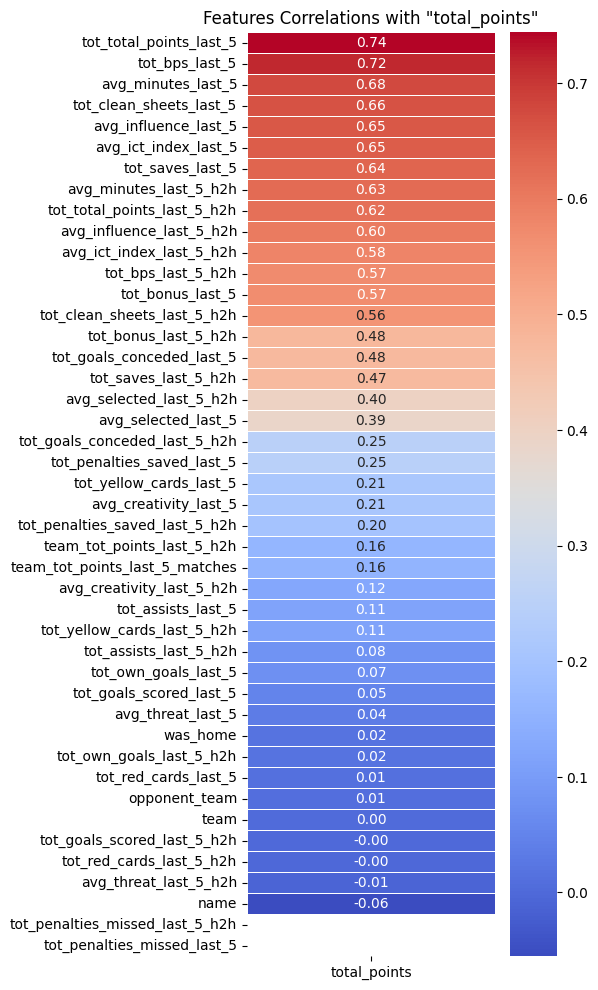

In [35]:
gk_data = df.loc[df.position == 2].drop('position', axis=1)
gk_correlations = calculate_display_correlations(gk_data, 'total_points')

In [36]:
df[(df['position'] == 2) & (df['tot_goals_scored_last_5'] > 0)]['name'].drop_duplicates()

9589    111
Name: name, dtype: int32

In [37]:
le_name.classes_[111]

'Alisson Ramses Becker'

Defender Position

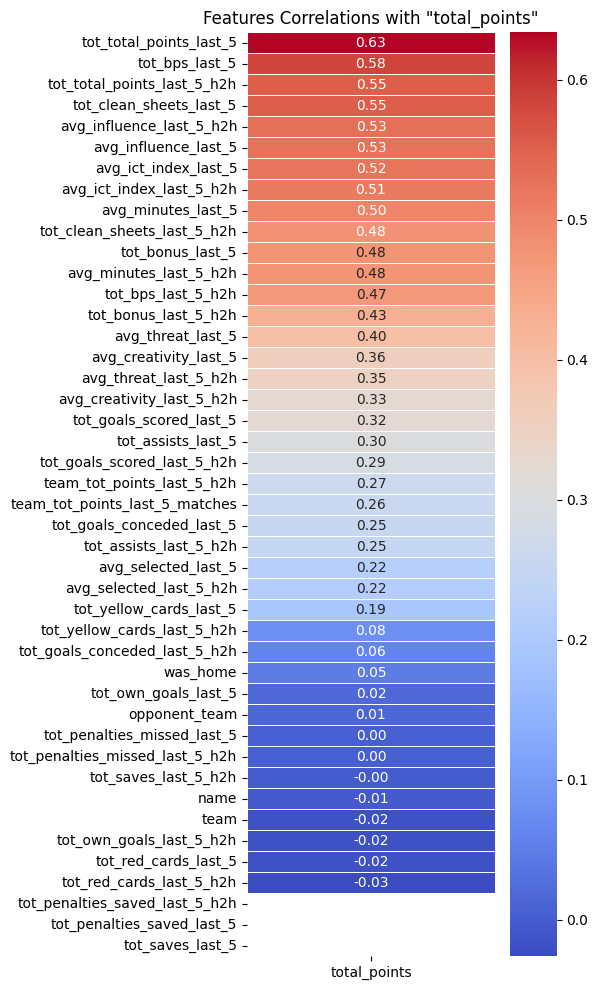

In [38]:
def_data = df.loc[df.position == 0].drop('position', axis=1)
def_correlations = calculate_display_correlations(def_data, 'total_points')

In [39]:
df[(df['position'] == 0) & (df['tot_saves_last_5_h2h'] > 0)]['name'].drop_duplicates()

195699    2321
Name: name, dtype: int32

In [40]:
le_name.classes_[2321]

'Álvaro Fernández'

Midfielder Position

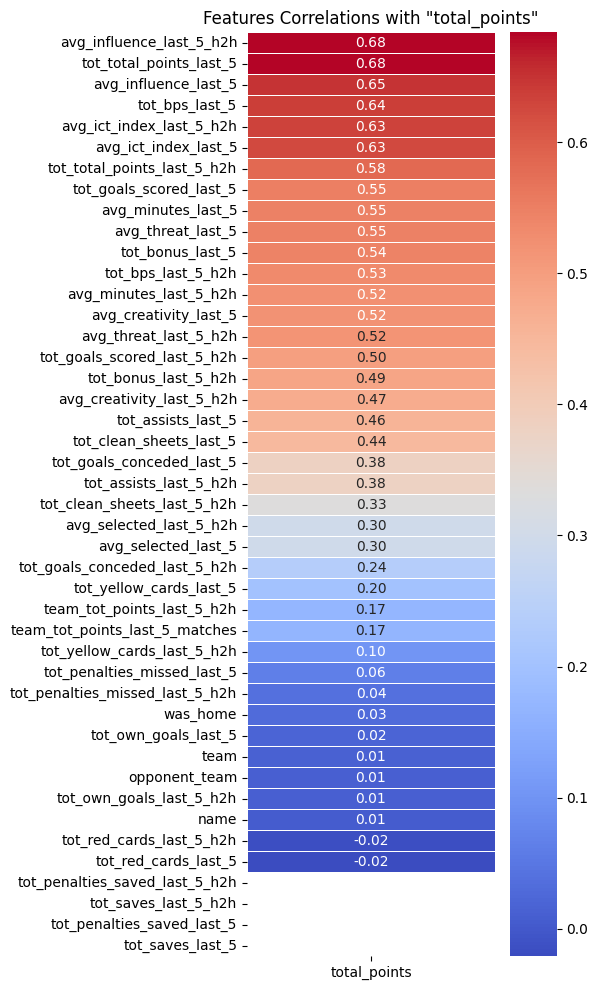

In [41]:
mid_data = df.loc[df.position == 3].drop('position', axis=1)
mid_correlations = calculate_display_correlations(mid_data, 'total_points')

In [42]:
df[(df['position'] == 3) & (df['tot_saves_last_5_h2h'] > 0)]

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5


Forward (FWD) Position

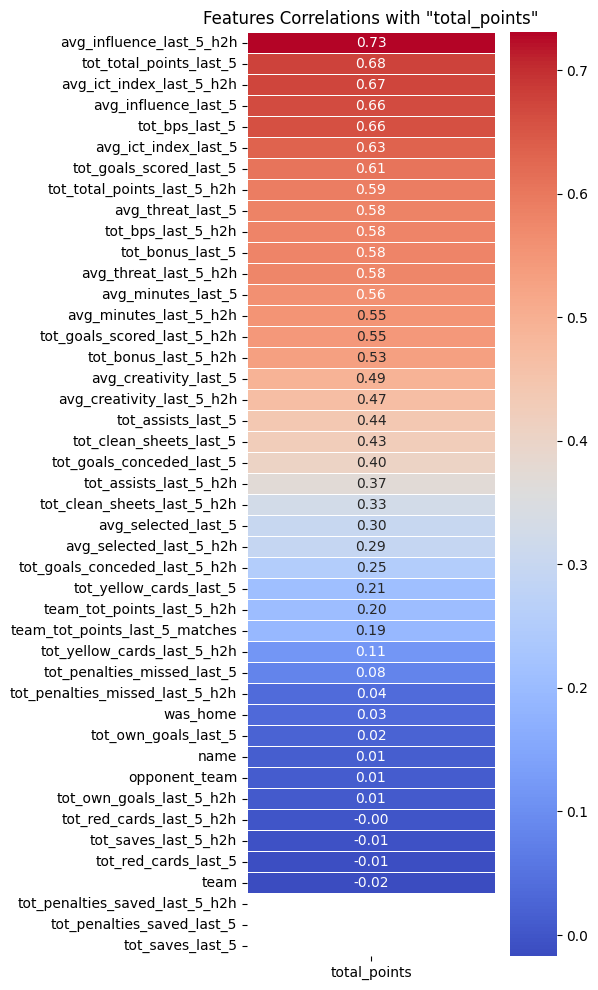

In [43]:
fwd_data = df.loc[df.position == 1].drop('position', axis=1)
fwd_correlations = calculate_display_correlations(fwd_data, 'total_points')

In [44]:
df[(df['position'] == 1) & (df['tot_saves_last_5'] > 0)]

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5


### Final Dataset

In [45]:
df.head(3)

,name,position,team,opponent_team,total_points,was_home,team_tot_points_last_5_matches,team_tot_points_last_5_h2h,tot_assists_last_5_h2h,tot_bonus_last_5_h2h,tot_bps_last_5_h2h,tot_clean_sheets_last_5_h2h,tot_goals_conceded_last_5_h2h,tot_goals_scored_last_5_h2h,tot_own_goals_last_5_h2h,tot_penalties_missed_last_5_h2h,tot_penalties_saved_last_5_h2h,tot_red_cards_last_5_h2h,tot_yellow_cards_last_5_h2h,tot_saves_last_5_h2h,tot_total_points_last_5_h2h,avg_ict_index_last_5_h2h,avg_influence_last_5_h2h,avg_creativity_last_5_h2h,avg_threat_last_5_h2h,avg_selected_last_5_h2h,avg_minutes_last_5_h2h,tot_assists_last_5,tot_bonus_last_5,tot_bps_last_5,tot_clean_sheets_last_5,tot_goals_conceded_last_5,tot_goals_scored_last_5,tot_own_goals_last_5,tot_penalties_missed_last_5,tot_penalties_saved_last_5,tot_red_cards_last_5,tot_yellow_cards_last_5,tot_saves_last_5,tot_total_points_last_5,avg_ict_index_last_5,avg_influence_last_5,avg_creativity_last_5,avg_threat_last_5,avg_selected_last_5,avg_minutes_last_5
0,0,1,4,17,0.222222,0,0.000000,0.000000,0.0,0.0,0.079051,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.266667,0.0,0.0,0.067847,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.266667
1,0,1,4,5,0.222222,1,0.066667,0.266667,0.0,0.0,0.079051,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.060606,0.007407,0.000000,0.105528,0.001468,0.066667,0.0,0.0,0.070796,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.05,0.011494,0.000000,0.089286,0.000734,0.166667
2,0,1,4,20,0.222222,0,0.333333,0.333333,0.0,0.0,0.079051,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.060606,0.014815,0.040323,0.090452,0.002386,0.222222,0.0,0.0,0.073746,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.10,0.011494,0.021277,0.116071,0.001285,0.188889


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   name                             196152 non-null  int32  
 1   position                         196152 non-null  int32  
 2   team                             196152 non-null  int32  
 3   opponent_team                    196152 non-null  int32  
 4   total_points                     196152 non-null  float64
 5   was_home                         196152 non-null  int64  
 6   team_tot_points_last_5_matches   196152 non-null  float64
 7   team_tot_points_last_5_h2h       196152 non-null  float64
 8   tot_assists_last_5_h2h           196152 non-null  float64
 9   tot_bonus_last_5_h2h             196152 non-null  float64
 10  tot_bps_last_5_h2h               196152 non-null  float64
 11  tot_clean_sheets_last_5_h2h      196152 non-null  float64
 12  to

In [47]:
df.columns

Index(['name', 'position', 'team', 'opponent_team', 'total_points', 'was_home',
       'team_tot_points_last_5_matches', 'team_tot_points_last_5_h2h',
       'tot_assists_last_5_h2h', 'tot_bonus_last_5_h2h', 'tot_bps_last_5_h2h',
       'tot_clean_sheets_last_5_h2h', 'tot_goals_conceded_last_5_h2h',
       'tot_goals_scored_last_5_h2h', 'tot_own_goals_last_5_h2h',
       'tot_penalties_missed_last_5_h2h', 'tot_penalties_saved_last_5_h2h',
       'tot_red_cards_last_5_h2h', 'tot_yellow_cards_last_5_h2h',
       'tot_saves_last_5_h2h', 'tot_total_points_last_5_h2h',
       'avg_ict_index_last_5_h2h', 'avg_influence_last_5_h2h',
       'avg_creativity_last_5_h2h', 'avg_threat_last_5_h2h',
       'avg_selected_last_5_h2h', 'avg_minutes_last_5_h2h',
       'tot_assists_last_5', 'tot_bonus_last_5', 'tot_bps_last_5',
       'tot_clean_sheets_last_5', 'tot_goals_conceded_last_5',
       'tot_goals_scored_last_5', 'tot_own_goals_last_5',
       'tot_penalties_missed_last_5', 'tot_penalties_save

In [48]:
le_name.classes_.tolist()

['Aaron Connolly',
 'Aaron Cresswell',
 'Aaron Hickey',
 'Aaron Lennon',
 'Aaron Mooy',
 'Aaron Ramsdale',
 'Aaron Ramsey',
 'Aaron Rowe',
 'Aaron Wan-Bissaka',
 'Abd-Al-Ali Morakinyo Olaposi Koiki',
 'Abdelhamid Sabiri',
 'Abdoulaye Doucouré',
 'Abdul Rahman Baba',
 'Abel Hernández',
 'Aboubakar Kamara',
 'Abu Kamara',
 'Adalberto Peñaranda',
 'Adam Armstrong',
 'Adam Clayton',
 'Adam Davies',
 'Adam Federici',
 'Adam Forshaw',
 'Adam Idah',
 'Adam Lallana',
 'Adam Legzdins',
 'Adam Masina',
 'Adam Matthews',
 'Adam Reach',
 'Adam Smith',
 'Adam Webster',
 'Adam Wharton',
 'Adama Diakhaby',
 'Adama Diomande',
 'Adama Traoré',
 'Adama Traoré Diarra',
 'Addji Keaninkin Marc-Israel Guehi',
 'Adedapo Awokoya-Mebude',
 'Ademipo Odubeko',
 'Ademola Lookman',
 'Ademola Ola-Adebomi',
 'Adlène Guédioura',
 'Admiral Muskwe',
 'Adnan Januzaj',
 'Adrian Blake',
 'Adrian Mariappa',
 'Adrien Sebastian Perruchet Silva',
 'Adrien Silva',
 'Adrián Bernabé',
 'Adrián San Miguel del Castillo',
 'Ahmed E

In [49]:
le_position.classes_

array(['DEF', 'FWD', 'GK', 'MID'], dtype=object)

In [50]:
le_team.classes_

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'Watford', 'West Bromwich Albion', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [51]:
le_opp_team.classes_

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham Hotspur',
       'Watford', 'West Bromwich Albion', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)